In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

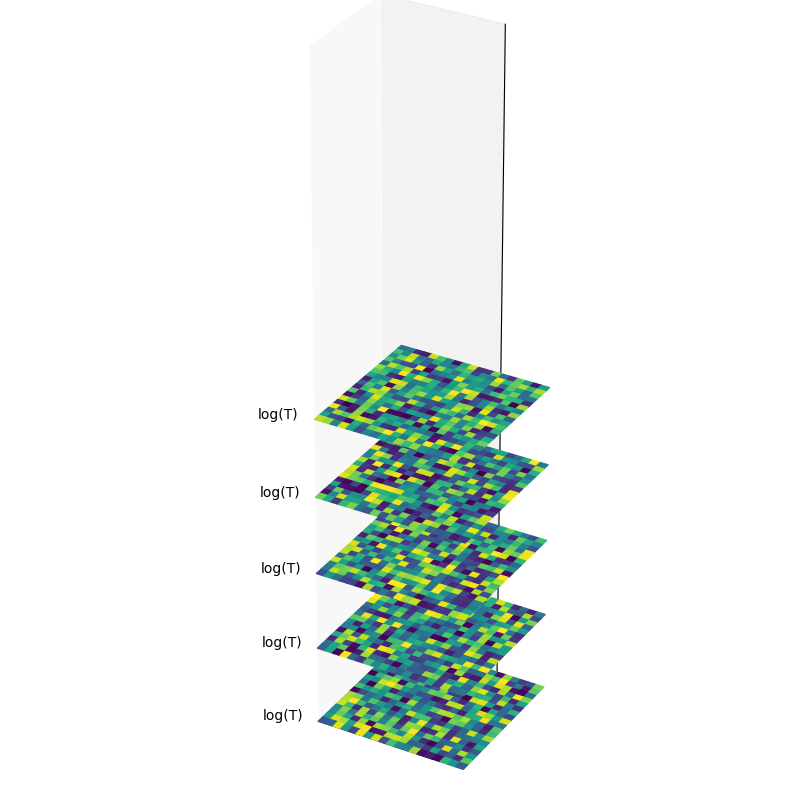

In [81]:
# Function to create random images
def create_random_image(height, width):
    return np.random.rand(height, width)

# Number of images
height, width = 20, 20
titles = ["log(T)", "log(EM)", "AIA 171 A", "Hα", "Ca II K"]
num_images = len(titles)


# Create a list of random images
images = [create_random_image(height, width) for _ in range(num_images)]

# Create 3D plot
fig = plt.figure(figsize=[10,30])
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Adjust the spacing between the layers
spacing = 10      # Change this value to adjust spacing
text_spacing = 2  # Spacing between text and layers

# Function to plot an image at a specific layer
def plot_image(ax, img, layer, spacing):
    x, y = np.mgrid[0:img.shape[1], 0:img.shape[0]]
    x = x.T
    y = y.T
    z = np.ones_like(x) * layer * spacing
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(img/img.max()), shade=False)
    return x, y, z

# Plot each random image in its layer
for i, img in enumerate(images):
    x, y, z = plot_image(ax, img, i, spacing)
    # ax.text(x.shape[1], y.shape[0]//2, i*spacing, f'Layer {i + 1}', color='black')
    ax.text(x[0,0] - text_spacing, y[0,0], i * spacing, f'{titles[0]}', color='black', fontsize=10, ha='right', va='center')


# Set labels and view angle
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Layer')
ax.view_init(elev=30, azim=-60)  # Adjust the elevation and azimuth to get a better view

limits = 15
ax.set_xlim(0, limits)
ax.set_ylim(0, limits)
ax.set_zlim(0, limits*num_images + spacing)
ax.set_box_aspect([limits, limits, limits*num_images])
# ax.set_box_aspect([1, 1, (limits*num_images + spacing) / limits])

# Hide the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

In [74]:
# # Set aspect ratio and limits
# limits = 20
# ax.set_xlim(0, limits)
# ax.set_ylim(0, limits)
# ax.set_zlim(0, limits * num_images + spacing)
# ax.set_box_aspect([1, 1, (limits * num_images + spacing) / limits])

# # Hide the axes
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])